In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
df.shape

(114000, 21)

In [3]:
df.track_genre.nunique() # not 125 for some reason

114

In [4]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [5]:
df.track_genre.value_counts() # balanced dataset

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
num_data = df.select_dtypes(exclude='object')
num_data = num_data.select_dtypes(exclude='bool')
num_data = num_data.drop(df.columns[0], axis=1)
num_data['track_genre'] = df['track_genre']
print(num_data.head())

   popularity  duration_ms  danceability  energy  key  loudness  mode  \
0          73       230666         0.676  0.4610    1    -6.746     0   
1          55       149610         0.420  0.1660    1   -17.235     1   
2          57       210826         0.438  0.3590    0    -9.734     1   
3          71       201933         0.266  0.0596    0   -18.515     1   
4          82       198853         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829    0.167  119.949   

   time_signature track_genre  
0               4    acoustic  
1               4    acousti

In [9]:
num_data.groupby('track_genre').mean()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,
acoustic,42.483,214896.957,0.549593,0.435368,5.045,-9.447843,0.816,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885
afrobeat,24.399,248412.791,0.669580,0.702812,5.551,-7.789353,0.511,0.086579,0.270860,0.253483,0.184596,0.698619,119.213337,3.946
alt-rock,33.943,235455.907,0.534493,0.754173,5.738,-6.191489,0.641,0.055071,0.122162,0.054097,0.210249,0.518260,124.634404,3.939
alternative,24.337,222016.180,0.559927,0.720030,5.567,-6.078777,0.606,0.070101,0.147820,0.038159,0.201376,0.495570,122.232394,3.942
ambient,44.191,237059.038,0.367867,0.237162,4.945,-18.601365,0.620,0.041562,0.776790,0.676221,0.129283,0.167498,111.113129,3.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,39.042,312311.477,0.684348,0.746413,5.515,-8.077874,0.556,0.064212,0.081414,0.540038,0.159434,0.321878,128.255482,3.967
trance,37.635,269007.478,0.583409,0.845272,5.712,-6.329711,0.484,0.079705,0.035870,0.423501,0.234357,0.276881,133.276726,3.957
trip-hop,34.460,274954.026,0.634695,0.622363,5.458,-9.239915,0.483,0.076303,0.225615,0.383761,0.190342,0.478069,118.743616,3.945


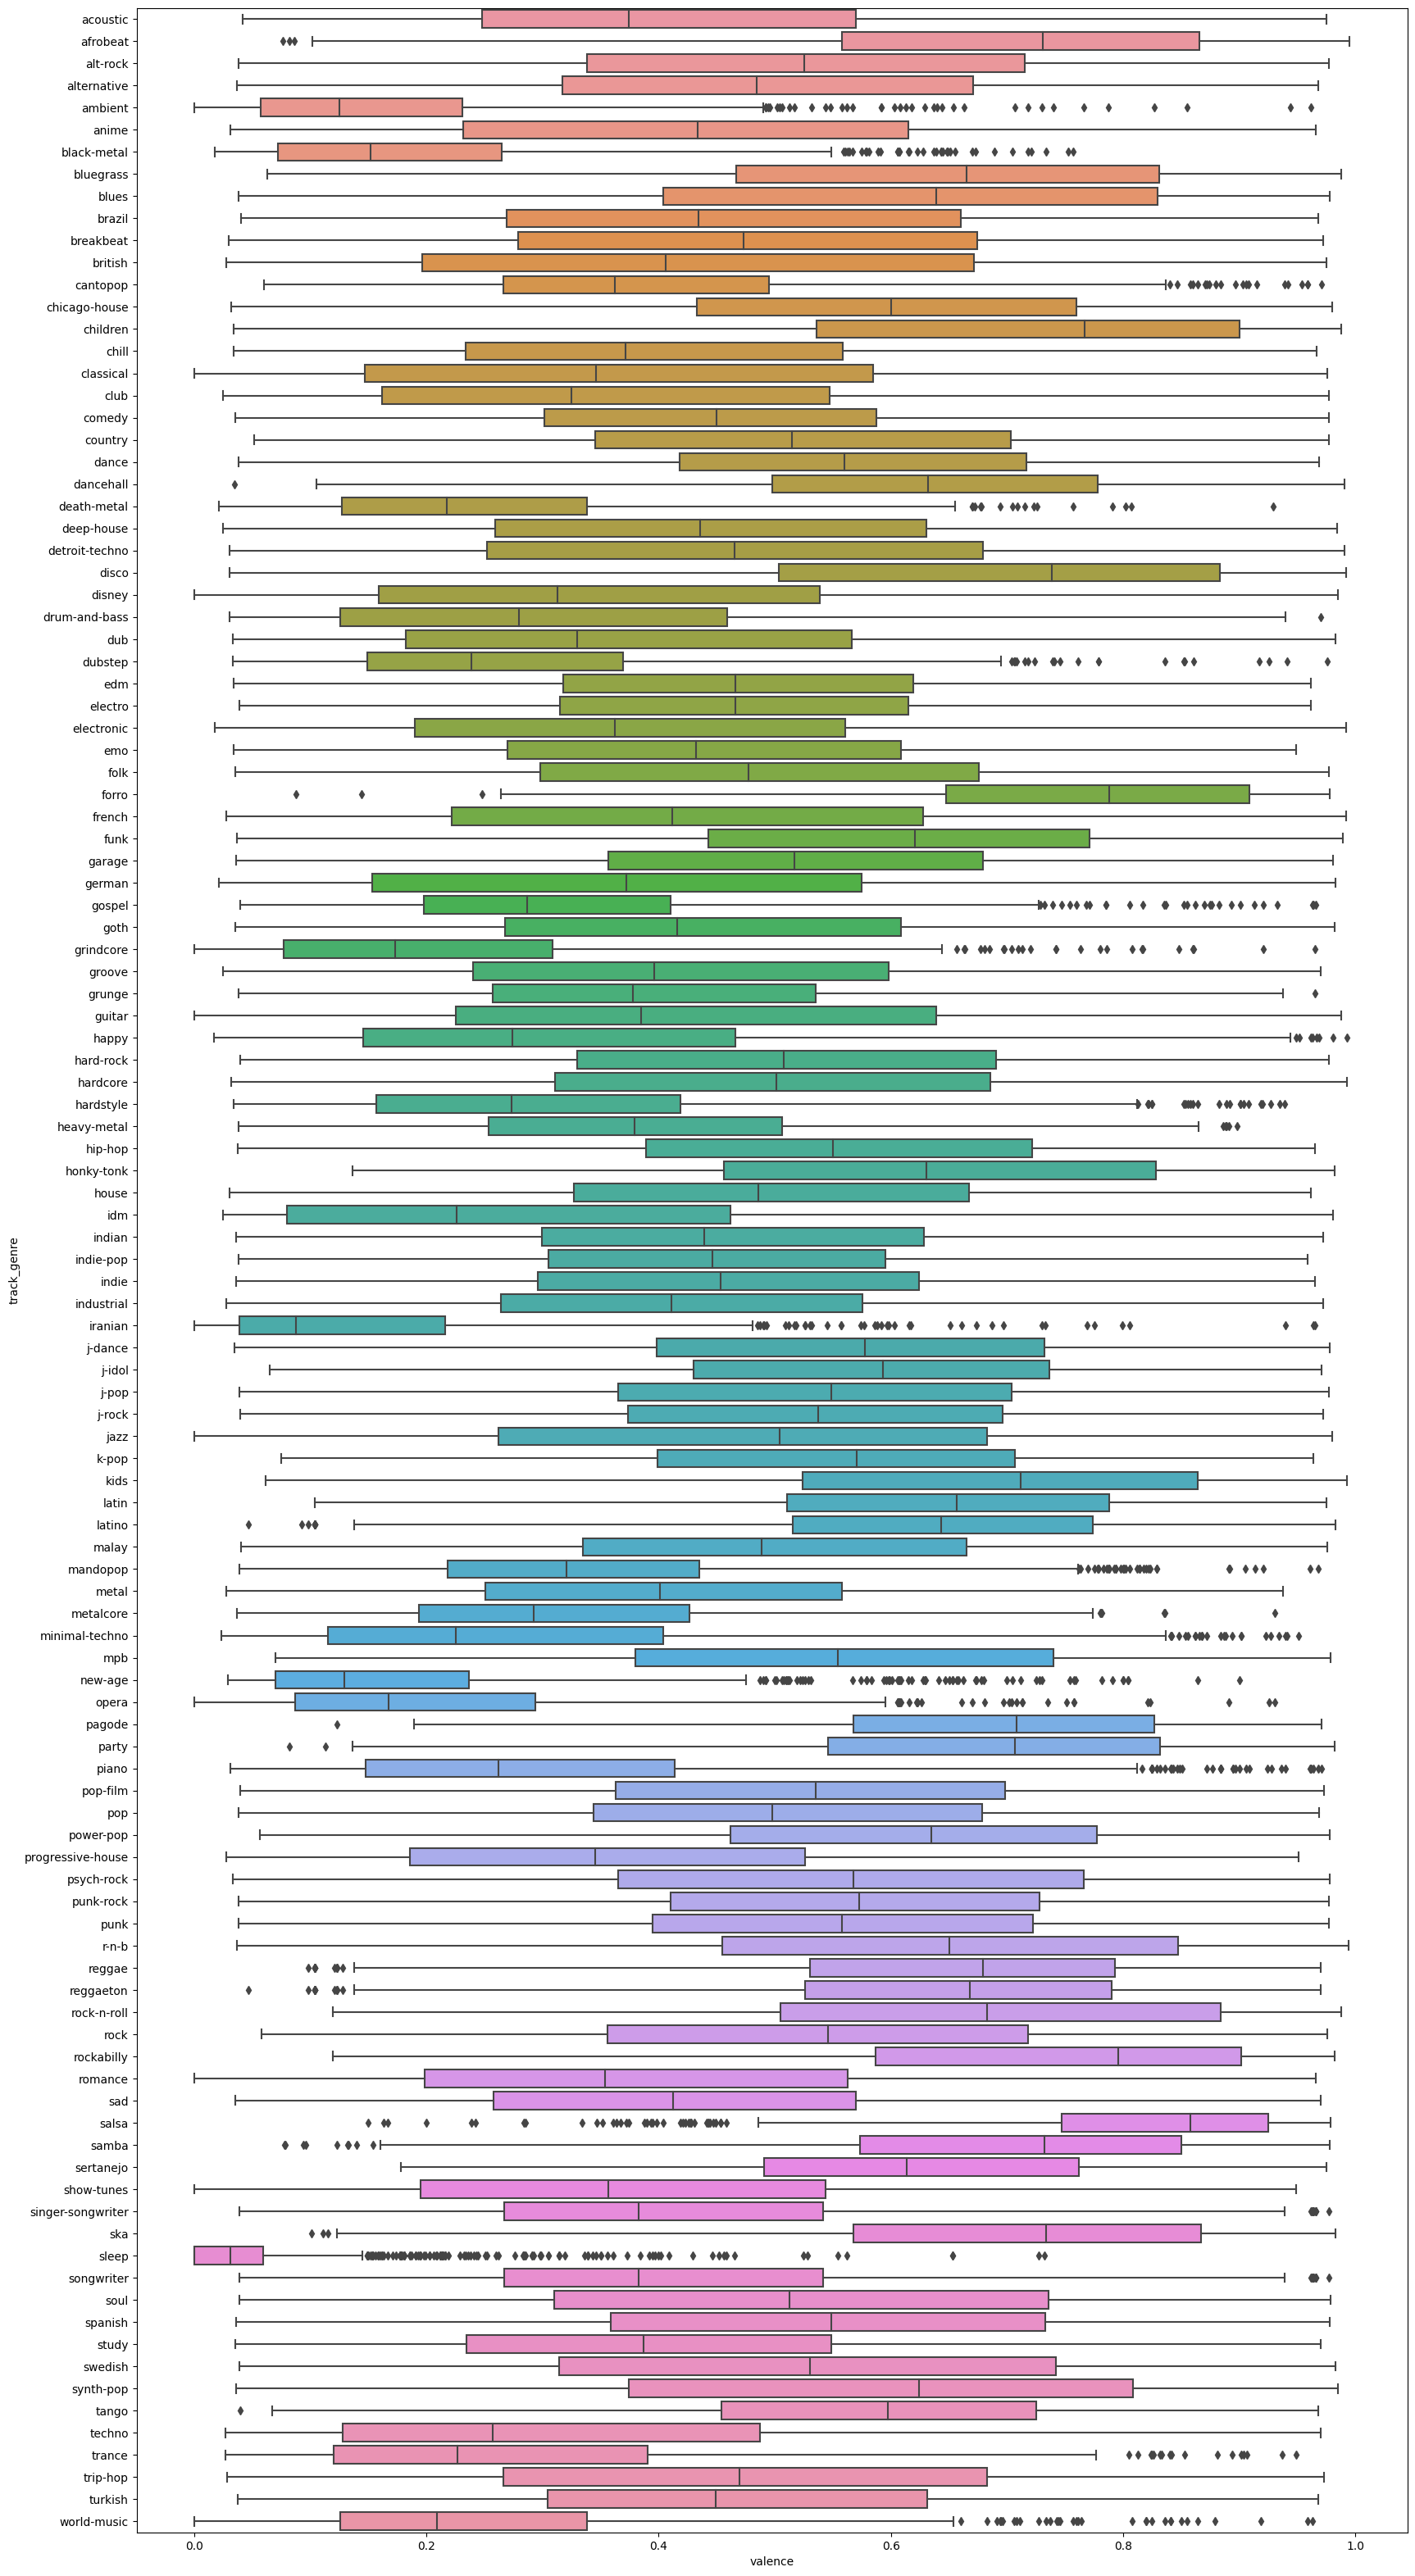

In [20]:
plt.figure(figsize=(20, 40))
sns.boxplot(data = df, x = 'valence', y = 'track_genre')
plt.show()